<a href="https://colab.research.google.com/github/ovieimara/MATPMD4/blob/master/MATPMD4_Assignment1_3422868.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import networkx as nx
from graphviz import Digraph , Source
from IPython.display import Image
from matplotlib import pyplot as plt
from typing import List, Tuple, Callable, Dict, Set, Any

1. Question: Have you read and understood the instructions on the cover page?

   **Solution**:
   
   YES

2. Some stochastic process, with states labelled A,B,C,D,E, has the following transition matrix.

**Solution**:

A stochastic matrix, also known as a probability matrix or transition matrix, is a square matrix that satisfies two important properties:

# Properties of a Stochastic Matrix
i. **Non_Negative**: All elements of the matrix are non-negative, i.e., p_ij ≥ 0 for all i and j. This means that each entry in the matrix represents a probability or a proportion, which cannot be negative.

ii. **Row sums equal 1**: The sum of each row in the matrix is equal to 1, i.e., ∑j=0 - j=∞ p_ij = 1. This ensures that the probabilities or proportions in each row add up to 100%, which is a fundamental property of probabilities.

2a: Using property 2, we can find X in 4th state using the formula, P[3][0] + P[3][1] + P[3][2] + x = 1

In [2]:
x = 1 - (0.31 + 0.19 + 0.21 + 0.13)
x = np.round(x, 2) #round up to 2 decimal places
print(f"The value of x = {x}")
P = [
      [0.2, 0.1, 0.21, 0.02, 0.47],
      [0.0, 1.0, 0.0, 0.0, 0.0],
      [0.0, 0.0, 1.0, 0.0, 0.0],
      [0.31, 0.19, 0.21, x, 0.13],
      [0.22, 0.32, 0.08, 0.28, 0.10]
    ]

P = np.array(P)
display(P)

The value of x = 0.16


array([[0.2 , 0.1 , 0.21, 0.02, 0.47],
       [0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.31, 0.19, 0.21, 0.16, 0.13],
       [0.22, 0.32, 0.08, 0.28, 0.1 ]])

Stochastic Process Transition State Diagram


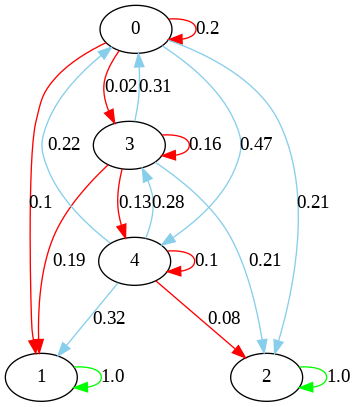

In [114]:
def renderStateDiagram(matrix):
  shape = matrix.shape[0]
  G = nx.MultiDiGraph( directed = True )
  for i in range(shape):
    for j in range(shape):
      if matrix[i][j] != 0: #node value check
        #add edges for each transition from i - j
        G.add_edge(str(i), str(j), weight = matrix[i][j] )
  dot = Digraph()

  for u, v, d in G.edges( data = True ):
    weight = d.get( 'weight' , 0)

    if weight > 0.5:
      color = 'green' #high probability
    elif weight > 0.2:
      color = 'skyblue' #medium probability
    else:
      color = 'red' #low probability
    dot.edge(u, v, label=str(weight), color=color) #set label and color for each edge

  src = Source(dot.source)
  src.format = 'png'
  return src

print(f"Stochastic Process Transition State Diagram")

src = renderStateDiagram(P)
Image(src.render())


2b. Assuming the initial distribution of states is A (13%), B (24%), C (32%), D (28%), and E (3%). calculate the distribution of states after 3 generations?

In [4]:
# def renderStateDiagram(matrix):
#   num_states = matrix.shape[0]
#   G = nx.DiGraph()
#   for i in range(num_states):
#     for j in range(num_states):
#       if matrix[i][j] != 0:
#         #add edges for each transition from i - j
#         G.add_edge(i , j , weight = matrix[i][j] )

#   # Draw the graph
#   pos = nx.circular_layout(G)  # Choose a layout (circular, spring, etc.)
#   edges = G.edges()
#   weights = [G[u][v]['weight'] * 2 for u, v in edges] #make weights visible.

#   nx.draw(G, pos, with_labels=True, node_size=600, edge_color='red', width=weights, arrowsize=15)
#   edge_labels = nx.get_edge_attributes(G, 'weight')
#   nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

#   plt.title("Transition State Diagram")
#   plt.show()

# src = renderStateDiagram(P)


**Solution**

2b. The Chapman-Kolmogorov equation states that:

pi^n = pi(0) (P)^n.

where pi(0) = initial states distribution

n = n generations(steps) and

pi^n = distribution of states after n steps

(P) = transition matrix

(P)^n = transition matrix after n steps

In [5]:
n = 3
pi = [13/100, 24/100, 32/100, 28/100, 3/100]
sum(pi)
P_3 = np.linalg.matrix_power(P, 3)

#distribution of states after 3 generations?
pi_3 = np.dot(pi, P_3)
print(f"The distribution of states after 3 generations is {np.round(pi_3, 3)}")

The distribution of states after 3 generations is [0.041 0.408 0.481 0.028 0.042]


**Solution**:

After 3 generations, the system has a probability:

4.1% of been in state 1

40.8.% of been in state 2

48.1% of been in state 3

2.8% of been in state 4

4.2% of been in state 5

This means that after 3 generations the system is most likely to be in state 3 with a probability of 48% followed next by state 2 with 41%.


2c. Rewrite P in the canonical form, clearly identifying R and Q.

**Solution**:

Canonical form of P:

      [

          [I, O],

          [R, Q]

      ]

n = size of square matrix

k = number of absorbing states
m = (n - k) number of transition steps

where,

I = identity matrix related to the absorbing states of size k

O = zero matrix of shape k * m

R = transitions from transient to absorbing states matrix of shape m * k

Q = transitions between transient states, matrix of shape m * m




In [6]:
#identify absorbing_states
visited_states = set()

def findAbsorbingStates(matrix: np.array) -> List[Tuple[int, int]]:
  absorbing_states = []

  #loop through each node(state)
  for i in range(len(matrix)):
    for j in range(len(matrix)):
      if i == j and matrix[i][j] == 1: #found absorbing state
        absorbing_states.append((i, j)) #store absorbing states
        visited_states.add((i, j)) #identify as belonging to a state

  return absorbing_states



In [7]:
absorbing_states = findAbsorbingStates(P)
display(absorbing_states)

[(1, 1), (2, 2)]

In [115]:
#function to get the absorbing rows
def absorbingRows(m):
  return {x[0] for x in absorbing_states}

#function to get the absorbing columns
def absorbingCols(m):
  return {x[1] for x in absorbing_states}

absorbing_rows = absorbingRows(P)
absorbing_cols = absorbingCols(P)

In [120]:
#identify transient to absorbing states
def find_R(matrix: np.array, absorbing_states: List[Tuple[int, int]]) -> List:
  R = []
  for r in range(matrix.shape[0]):
    row = []
    is_absorbing_row = False

    if r in absorbing_rows: #row with absorbing state
      is_absorbing_row = True

    if is_absorbing_row: #skip if absorbing state row
      continue

    for c in range(matrix.shape[0]):
      is_absorbing_col = False
      if c in absorbing_cols: #column with absorbing state
        is_absorbing_col = True

      if not is_absorbing_col: #skip if not absorbing state column
        continue

      row.append(matrix[r][c])
      visited_states.add((r, c)) #mark identified state
    R.append(row)
  return R

find_R(P, absorbing_states)

[[0.1, 0.21], [0.19, 0.21], [0.32, 0.08]]

In [118]:
#find the transitions between transient states(Q)
def find_Q(matrix: np.array, visited_states: Set) -> List[List]:
  Q = []
  for r in range(matrix.shape[0]):
    row = []
    is_absorbing_row = False
    if r in absorbing_rows: #row with absorbing state
      is_absorbing_row = True

    if is_absorbing_row: #skip row with absorbing state
      continue

    for c in range(matrix.shape[0]):
      is_absorbing_col = False
      if c in absorbing_cols:
        is_absorbing_col = True

      if is_absorbing_col: #skip if absorbing state column
        continue

      if (r, c) not in visited_states: #if not an identified state
        row.append(matrix[r][c])
    Q.append(row)
  return Q

find_Q(P, visited_states)

[[0.2, 0.02, 0.47], [0.31, 0.16, 0.13], [0.22, 0.28, 0.1]]

In [11]:
#(c) Rewrite P in the canonical form, clearly identifying R and Q.
n = len(P)
k = len(absorbing_states)
m = n - k

R = find_R(P, absorbing_states)
Q = find_Q(P, visited_states)

#identity matrix
I = np.identity(k)
I

#zero matrix
zero = np.zeros((k, m))
zero

# horizontally stack I + Zero matrices
i_zero = np.hstack((I, zero))

#horizontally stack R + Q matrices
r_q = np.hstack((R, Q))

# vertically stack izero + r_q
canonical_form = np.vstack((i_zero, r_q))

print(f"-----------The canonical form of P is ----------------", sep="\n")

print(f"\n {canonical_form} \n")

print(f"------------------R--------------------------------", sep="\n")

display(f" R = {R} ")
print(f"\n------------------Q----------------------------------------------", sep="\n")

display(f" Q = {Q} ")



-----------The canonical form of P is ----------------

 [[1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [0.1  0.21 0.2  0.02 0.47]
 [0.19 0.21 0.31 0.16 0.13]
 [0.32 0.08 0.22 0.28 0.1 ]] 

------------------R--------------------------------


' R = [[0.1, 0.21], [0.19, 0.21], [0.32, 0.08]] '


------------------Q----------------------------------------------


' Q = [[0.2, 0.02, 0.47], [0.31, 0.16, 0.13], [0.22, 0.28, 0.1]] '

d. For each state, i, calculate the mean number of times that the process is in a
transient state j, given it started in i.

**Solution:**

N =
∞
∑
k=0
Qk = (I − Q)^−1 ,

N also referred to as the fundamental matrix.
N = (I - Q)^-1

In [121]:
#4d. mean number of times that the process is in a transient state j, given it started in i
I = np.eye(len(Q))
N = np.linalg.inv(I - Q)
print(f"The mean number of times that the process is in a transient state j, given it started in i is: \n {np.round(N, 3)}")


The mean number of times that the process is in a transient state j, given it started in i is: 
 [[1.629 0.339 0.899]
 [0.696 1.395 0.565]
 [0.615 0.517 1.507]]


**Summary of N**

So, starting at State 1, it will spend 1.629 steps in state 1 and 0.339 steps in state 4 and 0.899 steps in state 5 before being absorbed.

Starting in State 4 it will spend 0.696 steps in state 1, 1.395 steps in state 4 and 0.565
steps in state 5 before being absorbed.

Starting in state 5 it will spend 0.6145 steps in state 1, 0.517 steps in state 4 and 1.507 steps in state 5 before being absorbed.



(e). For each state i, find the mean number of transitions before the process hits
an absorbing state, given that the process starts in a transient state i.

M = N Γ = (I − Q)−1 Γ

where: mean number of transitions before the process hits an absorbing state.

**Solution**

Γ = column vector containing 1's
N = as calulated above


In [123]:
#create column of ones
column_vector = np.ones((len(N), 1))

#calculate mean number of transitions
M = np.dot(N, column_vector)
print(f"The mean number of transitions before the process hits an absorbing state is \n {np.round(M, 3)}")


The mean number of transitions before the process hits an absorbing state is 
 [[2.866]
 [2.657]
 [2.638]]


**Summary of M**

So, starting in State 1, the process will hit an absorbing state, on average, in 2.866 steps.

Starting in State 4, it will hit an absorbing state in an average of 2.657 steps.

And finally, starting in State 5, it will hit an absorbing state in an average of 2.638 steps.




(f). For each state i, find the probability of ending in each of the absorbing states.

For a Markov chain with absorbing states, the probability that the chain starting in a transient state i and will be in absorbing state j is
denoted by the matrix B whose elements, b(ij), are given by:

B = NR = (I - Q)^-1 * R

where:

B = probability of ending in each of the absorbing states

R = calculated above

In [14]:
B = np.dot(N, R)
print(f"The probability of ending in each of the absorbing states is \n {np.round(B, 3)}")


The probability of ending in each of the absorbing states is 
 [[0.515 0.485]
 [0.516 0.484]
 [0.642 0.358]]


**Summary of B**

So starting from State 1, we get absorbed in state 2 with probability = 0.515 and state 3 with probability of 0.485.

Starting in State 4, we get absorbed in state 2 with probability of 0.516 and state 3 with probability of 0.484.

Starting in 5, we get absorbed in state 2 with probability of 0.642, and state 3 with probability of 0.358.

3. A generalised random walk is given by
**dS= a(x,t)dt+ b(x,t)dW**

where a(x,t),b(x,t) are given functions of space and time and dW is a Weiner process i.e. δW= ϵ√δt and ϵ is a random number normally distributed with a mean of 0 and a variance of 1.

**Solution**:

The a(x,t) dt term implies that x has an expected drift rate of a per unit time.

The b(x,t)dW term can be thought of as adding noise or variability to the path of x.

where dW = e√dt  [3]

a(x,t) = 1/alpha * sin(x) * cost(t)
b(x,t) = 1/beta


In [15]:
#3a. State your student number and α,β.
def alpha_beta(student_number: Any):
  first_3_digits = int(str(student_number)[:3])
  last_3_digits = int(str(student_number)[-3:])
  alpha = first_3_digits / 100
  beta = last_3_digits / 100
  return alpha, beta

student_number = 3422868
alpha, beta = alpha_beta(student_number)
print(f"My student number is: {student_number}, while value of alpha is {alpha} and the value of beta is {beta}")

My student number is: 3422868, while value of alpha is 3.42 and the value of beta is 8.68


**Solution**

3a. The student number is 3422868, while value of alpha is 3.42 and the value of beta is 8.68



3b. Simulate this random walk in 1 dimension with a(x,t) = 1/α sin(x) cos(t) and b(x,t) = 1/β.

**Solution:**

Simulate a Generalised Weiner Process (in 1D):

1. pick a starting point (x0).

2. pick a small incremental time, dt (must be positive).

3. calculate dW ~ N(0, √dt),

4. calculate a, b.

5. calculate dx = adt + bdW.

6. update the variables, t, x etc.

7. Repeat 3 - 6 [4]

In [85]:
def plot_walk(steps: List[float], walks:List[float]) -> None:
  plt.figure(figsize=(10, 5))
  plt.plot(steps, walks)
  plt.xlabel("Steps")
  plt.ylabel("Position")
  plt.title(f"1-Dimension Random Walk - {len(steps) - 1} steps")
  plt.grid(True)
  plt.show()

In [16]:
def generalised_random_walk(alpha: float, beta: float, x:float, t:float, dt: float) -> float:
  a = 1/alpha * np.sin(x) * np.cos(t) #ito process
  b = 1/beta #ito process
  e = np.random.normal(0, np.sqrt(1)) #random variable drawn from a standard normal distribution
  dW = e * np.sqrt(dt) #weiner process
  return (a * dt) + (b * dW)


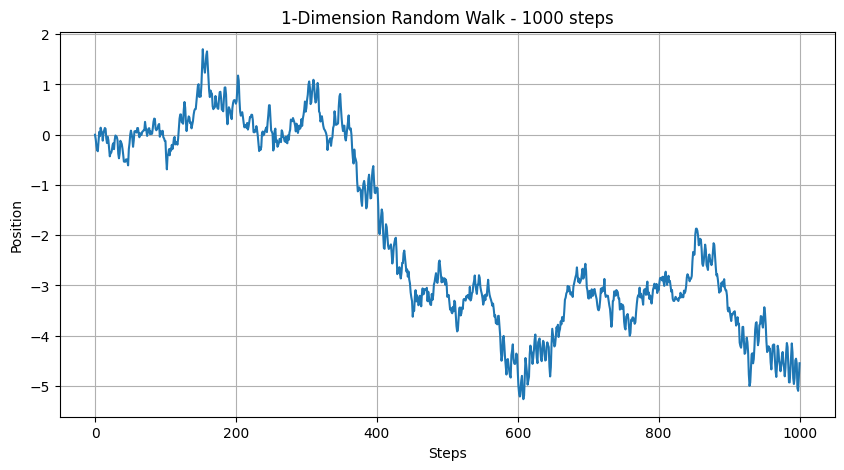

In [124]:
def simulate_random_Walk_1D(fn: Callable[[float, float, float, float], float], x:float, t: int, dt: float=0.1, alpha: float = 0.1, beta: float = 0.1, steps: int=10):
  walks = [x]
  time = [t]
  for _ in range(steps):
    #fetch current x and t
    t = time[-1]
    x = walks[-1]

    #calculate latest random step
    dS = fn(alpha, beta, x, t, dt)

    #store latest walk
    walks.append(walks[-1] + dS)
    time.append(time[-1] + dt)

  return walks, time

fn = generalised_random_walk
walks, steps = simulate_random_Walk_1D(fn=fn, x=0, t=0, dt=1, alpha=alpha, beta=beta, steps=1000)
plot_walk(steps, walks)


(c). Estimate the expected value for your walk after 2500 steps with dt = 0.1.

**Solution**:

To estimate the expected value, we need to simlulate the walk over multiple iterations and take the mean of the final positions during each simulation.

The expected value for the walk after 2500 steps with dt= 0.1 is 0.178


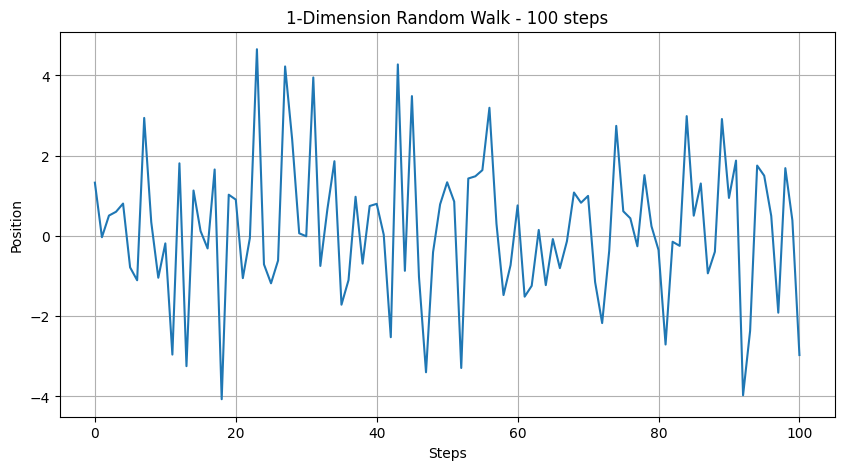

In [127]:
#expected value for walk after 2500 steps with dt= 0.1
f = generalised_random_walk
x= 0
t = 0
final_values = []

for _ in range(101):
  walks, steps = simulate_random_Walk_1D(fn=f, x=0, t=0, dt=0.1, alpha=alpha, beta = beta, steps=2500)
  final_values.append(walks[-1]) #store final positiom

expected_value = np.mean(final_values) #average of final positions
print(f"The expected value for the walk after 2500 steps with dt= 0.1 is {np.round(expected_value, 3)}")

plot_walk(range(len(final_values)), final_values)

In [128]:
def simulate_walk_dt(fn: Callable, f: Callable, deltas: List, steps: int, alpha: float, beta: float, n: int, x: float, t: float) -> Dict:
    #{dt: [estimate, std]}
    walks = {}
    for dt in deltas:
        walk = []
        for _ in range(n):
            walk_dt = fn(f, x, t, dt, alpha, beta, steps)[0][-1] #simulate walk
            walk.append(walk_dt) #store final position

        walks[dt] = (np.mean(walk), np.std(walk)) #store mean and standard deviation as tuples

    return walks



In [129]:
def plot_analysis(deltas, errors):
  plt.figure(figsize=(8, 6))
  plt.plot(deltas, errors, marker='o', linestyle='-')
  plt.xlabel("dt (Time Step)")
  plt.ylabel("Estimated Error Value")
  plt.title("Error Analysis of Random Walk Simulation")
  plt.grid(True)
  plt.show()

Error with dt = 0.01 is: 0.598
Error with dt = 0.03 is: 0.963
Error with dt = 0.05 is: 1.234
Error with dt = 0.07 is: 1.46
Error with dt = 0.1 is: 1.755
Error with dt = 0.3 is: 3.18
Error with dt = 0.5 is: 4.165
Error with dt = 0.8 is: 5.028
Error with dt = 1 is: 5.252


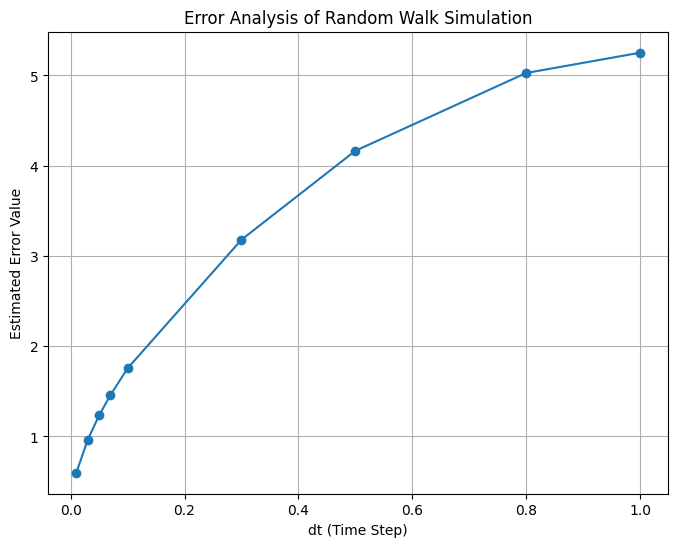

In [130]:
deltas = [0.01, 0.03, 0.05, 0.07, 0.1, 0.3, 0.5, 0.8, 1]
f = generalised_random_walk
fn = simulate_random_Walk_1D
walks = simulate_walk_dt(fn=fn, f=f, deltas=deltas, steps=2500, alpha=alpha, beta=beta, n = 500, x=0, t=0)

errors = []
expected_values = []
for dt, (expected_value, error) in walks.items():
  errors.append(error)
  expected_values.append(expected_value)
  print(f"Error with dt = {dt} is: {np.round(error, 3)}")

plot_analysis(deltas, errors)

As seen from the plot above as **dt** increases the error increases. As **dt** reduces, error reduces. Signifying dt is directly proportional with error.

For higher accuracy:
1. Use a smaller **dt**.
2. Increase the number of simulations.

Using a smaller **dt** means more steps and computation time.

**Probability Algorithm:**

1. Simulate the random walk

2. if absolute value of the position after the walk from 1, is less than or equals to two(2), then count the value.

3. Repeat 1 and 2 N times.

4. Divide total count by total number of simulations(N) done

**Error Estimate**

standard error of mean = standard deviation / sqrt(N). [4]


In [132]:
#probability probability that |x|≤2.0 after 2500 steps
def calc_probability(dt=0.1, steps=5, n=10):
  positions = []
  count = 0
  f = generalised_random_walk
  fn = simulate_random_Walk_1D

  for i in range(n):
      walks, steps = simulate_random_Walk_1D(fn=f, x=0, t=0, dt=0.1, alpha=alpha, beta = beta, steps=2500)
      if np.abs(walks[-1]) <= 2.0:
        positions.append(abs(walks[-1])) #store poistions
        count += 1

  return count/n, positions

N = 1000
p, positions = calc_probability(dt=0.1, steps=2500, n=N)

sem = np.std(positions)/np.sqrt(N) #standard error of mean

print(f"The probability that |x| <= 2.0 after 2500 steps is {np.round(p, 3)}")
print(f"The probability error estimate is: {sem}" )


The probability that |x| <= 2.0 after 2500 steps is 0.777
The probability error estimate is: 0.01693122197798233


(4). Find the maximum of the 4D function, f(w,x,y,z)

**Metropolis-Hastings Algorithm:**

1. Initialize the coordinates(w, x, y, z).

2. Calculate the current value of f(w, x, y, z).

3. Propose a trial step and update the proposed      
   coordinates(w', x', y', z'),

4. Ensure the proposed coordinates are within the
   specified domain/bounds

5. Calculate the proposed value of f(w', x', y', z')

6. Calculate the acceptance ratio,
   alpha = f(w', x', y', z') / f(w, x, y, z)

7. Generate a random number r in [0, 1]

8. Accept the step if r < alpha or alpha >= 1,    
   set the current coordinates to the proposed coordinates and store the value of f(w', x', y', z') otherwise reject step

9. Repeat steps 3 - 8

In [142]:
#4D function
def function_4d(w: float, x: float, y: float, z: float) -> float:
  wave = np.sin(w/2) * np.cos(x/2) * np.sin(y/2) * np.cos(z/2)
  peak1 = 2 * np.exp(-0.1 * ((w-2)**2 + (x-2)**2 + (y-2)**2 + (z-2)**2))
  peak2 = 3/2 * np.exp(-0.1 * ((w+2)**2 + (x+2)**2 + (y+2)**2 + (z+2)**2))

  return wave + peak1 + peak2

In [139]:
# metropolis_hastings function to determine maximum
def maximize_metropolis_hastings(fn: Callable[[float, float, float, float], float], step_size: int, domain: Tuple[int, int], n_iterations: int=1000) -> Tuple[List, List, List]:

  #choose an initial coordinates w, x, y, z for the Markov chain
  current_coordinates = np.random.uniform(-5, 5, 4)
  current_value = fn(*current_coordinates)
  values_fn = [current_value]
  coordinates_fn = [current_coordinates]
  accepted_steps = []
  left, right = domain

  for _ in range(n_iterations):

    #propose a trial step for w', x', y', z'
    proposed_coordinates = current_coordinates + np.random.normal(0, step_size, 4)  #propose a trial step for w', x', y', z'

    proposed_coordinates = np.clip(proposed_coordinates, left, right) #ensure the proposed coordinates are within the bounds(domain)

    proposed_value = fn(*proposed_coordinates)

    #calculate acceptance ratio(alpha)
    if current_value == 0:
      alpha = np.inf if proposed_value > 0 else 0.0 #prevent divide by zero error
    else:
      alpha = proposed_value/current_value

    #accept or reject the proposed step
    r = np.random.uniform(0, 1)
    if alpha >= 1 or r < alpha: #if alpha is greater then or random number less than alpha, accept the proposed step
      accepted_steps.append(1)
      current_coordinates = proposed_coordinates
      current_value = proposed_value
    else:
      accepted_steps.append(0)

    #store the current value and coordinates
    values_fn.append(current_value)
    coordinates_fn.append(current_coordinates)

  return values_fn, coordinates_fn, accepted_steps

In [153]:
def plot_function(values_fn, title = ''):
  title = 'Metropolis-Hastings Random Walk' if title == '' else title
  plt.figure(figsize=(10, 5))
  plt.plot(values_fn, linestyle='-')
  plt.xlabel("Steps")
  plt.ylabel("Position")
  plt.title(f"{title}")
  plt.grid(True)
  plt.show()

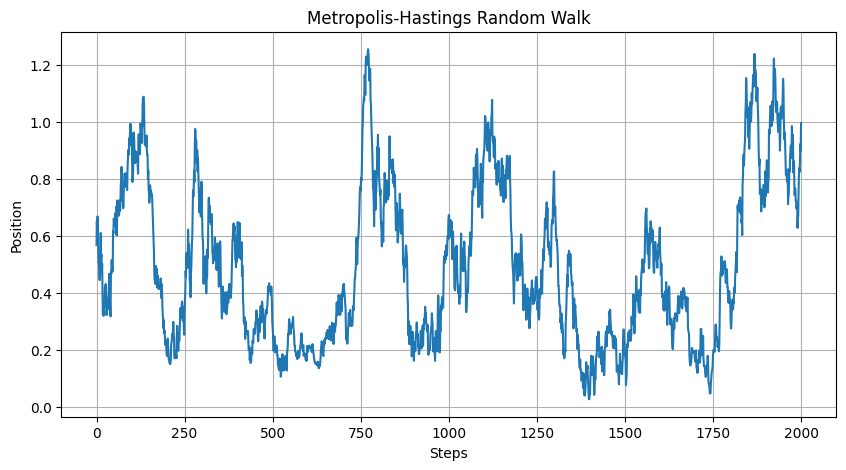

In [143]:
#4a. Plot the value of the function at each step you take
n_iterations=2000
step_size=0.1
domain=(-5, 5)
fn = function_4d
values_fn, coordinates, accepted_steps = maximize_metropolis_hastings(fn=fn, step_size=step_size, domain=domain, n_iterations=n_iterations)
plot_function(values_fn)


In [144]:
#4b. Give the coordinates of the maximum value.
w, x, y, z = coordinates[np.argmax(values_fn)]
print(f"The coordinates of the maximum value {np.max(values_fn)} are w: {w}, x: {x}, y: {y}, z: {z}")

The coordinates of the maximum value 1.2540838122244051 are w: -1.9253193463247034, x: 0.10696115851402245, y: -1.5193135300517375, z: -0.006960185590902099


The maximum value keeps flunctuating between differing maximum values e.g 1.3622043907511112, 1.7823247704269252, 0.6567511745443932, 1.2910027125126708, 0.8393336943054992 and sometimes negative values.

This signifies that the function is yet to converge at a true global maximum. It's most likely stuck at local maximums. So we will need to fine tune the algorithm.

In [145]:
#(4c). acceptance ratio of your rejection step
acceptance_ratio = sum(accepted_steps)/n_iterations
print(f"The acceptance ratio of the rejection step is {acceptance_ratio}")

The acceptance ratio of the rejection step is 0.958


For many problems, an acceptance ratio between 0.2 and 0.5 is often considered reasonable. This range often represents a good balance between exploration and acceptance[1].

**Fine-Tuning the Metropolis-Hastings Algorithm and Determining the True (Global) Maximum**

I would fine tune the algorithm by:

**1. Increasing The Number of Iterations Run:**

Run the algorithm for a larger number of steps to ensure thorough exploration of the parameter space.
More steps increase the likelihood of finding the global maximum.

**2. Manually Adjusting the Step Size**:

The step size controls the next step the algorithm proposes to move from the current point in each step.
If the step size is too little, the algorithm explores the space very slowly, leading to slow convergence and needing more computing capacity.

If the step size is too big, the algorithm may take steps that are far from the current point, and miss the target coordinates, failing to explore the space effectively.

To achieve optimal step size, I will be adjusting the step size iteratively and monitor the acceptance ratio until it falls within the range 0.2 - 0.5[1].

**3. Using Adaptive Step Sizes:**

Dynamically adjust the step size during the random walk based on the acceptance ratio.

If the acceptance ratio is too big, the step size is increased, while if the acceptance ratio is too low, the step size is decreased.


**4. Running Multiple Chains:**

Will start the algorithm from different initial points and run multiple independent chains. I will then compare the results from different chains to ensure consistency and reduce the likelihood of getting stuck in a local maxima.

**5. Visualizing the Function:**

plot the function to visually identify the global maximum.

**6. Markov chains Convergence Diagnostics:**

Geweke's Diagnostic: By Comparing the means of the first 10% and last 50% parts of the chain. Similar means indicate convergence, that means z_score closer to zero.

Potential Scale Reduction (R): Calculate the R statistic for multiple chains. Values close to 1 suggest convergence.

In [165]:
def plot_multiple_chains(values_fn: List[List], n_chains: int, title = ''):
  plt.figure(figsize=(10, 6))
  for i in range(n_chains):
      plt.plot(values_fn[i], label=f"Chain {i + 1}")
  plt.xlabel("Step")
  plt.ylabel("f(w, x, y, z)")
  plt.title('Metropolis-Hastings Random Walk' if title == '' else title)
  # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.grid(True)
  plt.show()

The coordinates of the maximum value 2.318217727028741 are w: 2.2248799932833836, x: 1.4306180550615852, y: 2.2415352400176487, z: 1.4274812489920794


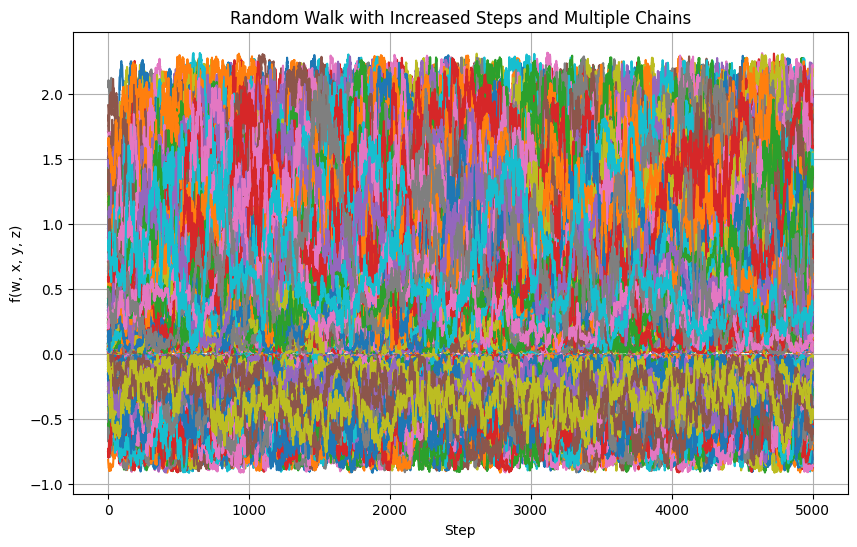

In [169]:
# Metropolis-Hastings algorithm with fine-tuning, running multiple chains and increasing number of iterations
def fine_tune_chain(fx: Callable, f: Callable[[float, float, float, float], float], step_size: int, domain: Tuple, n_iterations: int =1000, n_chains: int =100) -> Tuple[int, Tuple[float, float, float], List]:

  max_value = -np.inf
  max_coordinates = None
  values_fn = []

  for _ in range(n_chains):
    values, coordinates, _ = fx(f, step_size, domain, n_iterations) # execute maximize_metropolis_hastings function
    values_fn.append(values)

    max_index = np.argmax(values) #index of the max value
    if values[max_index] > max_value: #check larger value btw previous and current values
      max_value = values[max_index] #select max value
      max_coordinates = coordinates[max_index] #select max coordinates

  return max_value, max_coordinates, values_fn

n_iterations = 5000
n_chains = 1000
fx = maximize_metropolis_hastings
maxima_value, max_coordinates, values_fn = fine_tune_chain(fx, fn, step_size=0.1, domain=(-5, 5), n_iterations=n_iterations, n_chains=n_chains)
w, x, y, z = max_coordinates

print(f"The coordinates of the maximum value {maxima_value} are w: {w}, x: {x}, y: {y}, z: {z}")
title = "Random Walk with Increased Steps and Multiple Chains"
plot_multiple_chains(values_fn, n_chains, title)


**Fine-Tuning the Metropolis-Hastings Algorithm and Determining the True (Global) Maximum using Dynamic step size**

1. We define a target acceptance ratio

2. We monitor the acceptance ratio:

   Track the number of accepted steps over a window of recent steps (e.g. the last 100 steps).

3. We adjust the step size:

   If the acceptance ratio is too high (e.g. > 0.5), we increase the step size to encourage larger jumps, else if the acceptance ratio is too low (e.g., < 0.2), decrease the step size to reduce the rejection rate.

4. We ensure the step size does not become too large
   or too small by setting minimum and maximum bounds.


The maximum value using dynamic step size adjustment is: 2.3079471498054525 and the coordinates are w: 2.292663649193332, x: 1.6276208636360685, y: 2.346824884969316, z: 1.3907739516099005


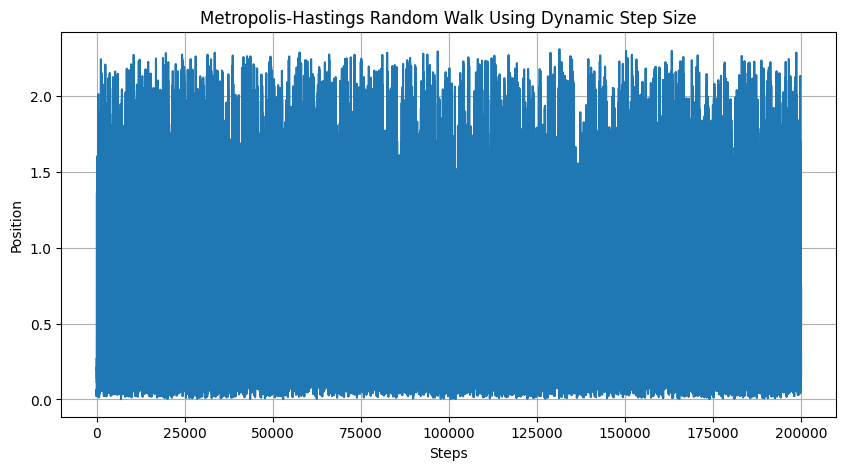

In [163]:
#dynamic step size adjustment with increased iterations
def dynamic_step_size_metro_hastings(fn: Callable[[float, float, float, float], float], step_size: float, domain: Tuple[int, int], n_iterations: int = 100, acceptance_threshold: int = 0.234, acceptance_ratio_window: int = 100) -> Tuple[List[float], List[Tuple], List[int], Tuple[float, float, float, float], int, float]:
  #choose an initial value w, x, y, z for the Markov chain
  current_coordinates = np.random.uniform(-5, 5, 4)

  accepted_steps = []
  left, right = domain
  current_value = fn(*current_coordinates)
  values_fn = [current_value]
  max_value_fn = current_value
  max_coordinates = current_coordinates
  coordinates = [current_coordinates]
  accepted_step_count = 0

  for steps in range(n_iterations):
    #propose a trial step w', x', y', z'
    proposed_coordinates = current_coordinates + np.random.normal(0, step_size, 4)
    proposed_coordinates = np.clip(proposed_coordinates, left, right)

    #calculate the new value
    proposed_value = fn(*proposed_coordinates)

    #prevent divide by zero error
    if current_value == 0:
      alpha = np.inf if proposed_value > 0 else 0.0
    else:
      alpha = proposed_value/current_value


    #accept or reject the step
    r = np.random.uniform(0, 1)
    if alpha >= 1 or r < alpha:
      accepted_steps.append(1)
      accepted_step_count += 1
      current_value = proposed_value
      current_coordinates = proposed_coordinates

    else:
      accepted_steps.append(0)

    #update maximum value and coordinates
    if current_value > max_value_fn:
      max_value_fn = current_value
      max_coordinates = current_coordinates

    #store current function value & coordinates
    values_fn.append(current_value)
    coordinates.append(current_coordinates)

    # adjust step size dynamically
    if steps >= acceptance_ratio_window:

      #calculate acceptance ratio over the last 'acceptance_ratio_window' steps
      acceptance_ratio = np.mean(accepted_steps[-acceptance_ratio_window:])
      if acceptance_ratio < acceptance_threshold - 0.1:
        step_size *= 0.9 #decrease step size

      elif acceptance_ratio > acceptance_threshold + 0.1:
        step_size *= 1.1 #increase step size

      #bound step size to ensure values outside the interval are clipped to interval edges
      step_size = np.clip(step_size, 0.01, 1.0)


  return values_fn, coordinates, accepted_steps, max_coordinates, accepted_step_count, max_value_fn
fn = f
step_size = 0.1
domain = (-5, 5)
# n_iterations = 2000000
n_iterations = 200000
acceptance_threshold = 0.3 #acceptance_ratio_window
acceptance_ratio_window = 100

values_fn, coordinates, accept_steps, max_coordinates, accept_step_count, maxima_value = dynamic_step_size_metro_hastings(fn, step_size, domain, n_iterations, acceptance_threshold, acceptance_ratio_window)

print(f"The maximum value using dynamic step size adjustment is: {maxima_value} and the coordinates are w: {max_coordinates[0]}, x: {max_coordinates[1]}, y: {max_coordinates[2]}, z: {max_coordinates[3]}")
plot_function(values_fn, title="Metropolis-Hastings Random Walk Using Dynamic Step Size")

The maximum value for dynamic step size adjustment & multiple chains is: 2.31758769257483 and the coordinates are w: 2.255794339504077, x: 1.4771640794540564, y: 2.2917796439247797, z: 1.5283343360453683


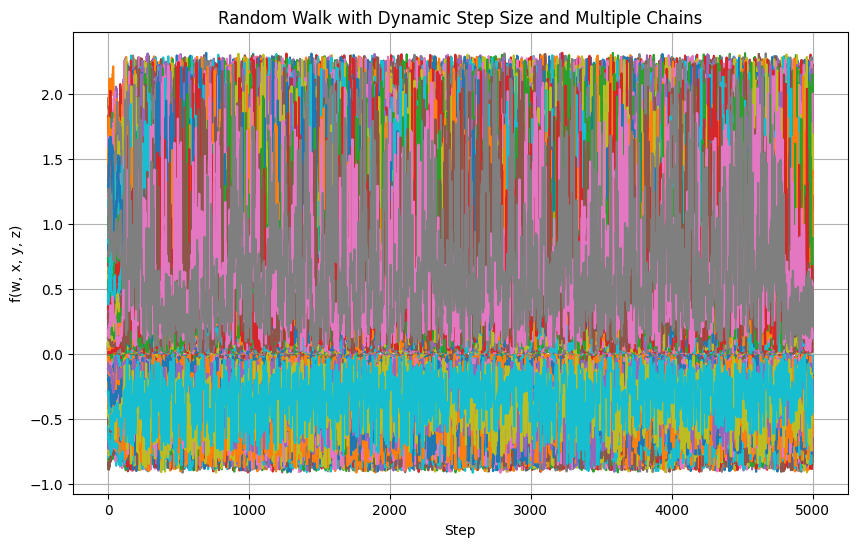

In [168]:
#running multiple chains with dynamic step size update
def run_multiple_chains(fn, step_size: int, domain: Tuple, n_iterations: int =1000, n_chains: int =10, acceptance_threshold: int = 0.2, acceptance_ratio_window: int = 100) -> Tuple[List[float], List[Tuple], List[int], Tuple[float, float, float, float], int, float]:
  max_value_chains = -np.inf
  max_coordinates_chains = None
  values_chains = []
  coordinates_chains = []
  accept_steps_chains = []
  # all_values = []

  for _ in range(n_chains): #loop through each chain
    values_fn, coordinates, accept_steps, max_coordinates, accept_step_count, maxima_value = dynamic_step_size_metro_hastings(fn, step_size, domain, n_iterations, acceptance_threshold, acceptance_ratio_window)
    # for value in values_fn:
    #   all_values.append(value)

    values_chains.append(values_fn)
    coordinates_chains.append(coordinates)
    accept_steps_chains.append(accept_steps)

    #update maximum value and coordinates
    if maxima_value > max_value_chains:
      max_value_chains = maxima_value
      max_coordinates_chains = max_coordinates

  return values_chains, coordinates_chains, accept_steps_chains, max_value_chains, max_coordinates_chains

fn = f
step_size = 0.1
domain = (-5, 5)
n_iterations = 5000
n_chains = 1000
acceptance_threshold = 0.234
acceptance_ratio_window = 100
values_chains, coordinates_chains, accept_steps_chains, maxima_value_chains, max_coordinates_chains = run_multiple_chains(fn, step_size, domain, n_iterations, n_chains, acceptance_threshold, acceptance_ratio_window)
print(f"The maximum value for dynamic step size adjustment & multiple chains is: {maxima_value_chains} and the coordinates are w: {max_coordinates_chains[0]}, x: {max_coordinates_chains[1]}, y: {max_coordinates_chains[2]}, z: {max_coordinates_chains[3]}")

title = "Random Walk with Dynamic Step Size and Multiple Chains"
plot_multiple_chains(values_chains, n_chains, title)


From the plot the function seems to have converged as:

- large segment of Markov chains are giving similar results
- Multiple chains initialised from different initial conditions giving similar results[2].


In [170]:
def geweke_diagnostic(chains, first_part=0.1, last_part=0.5):

    n_first = int(len(chains) * first_part)  # Number of samples in the first part
    n_last = int(len(chains) * last_part)   # Number of samples in the last part
    print(chains[0])
    #split the chain
    first_part = chains[:n_first]
    last_part = chains[-n_last:]

    #calculate means and variances of the parts
    mu_first, mu_last = np.mean(first_part), np.mean(last_part)
    var_first, var_last = np.var(first_part, ddof=1), np.var(last_part, ddof=1)

    #compute the z-score
    z_score = (mu_first - mu_last) / np.sqrt(var_first / n_first + var_last / n_last)

    return z_score

z_score = geweke_diagnostic(values_chains)
print(f"The z-score is: {(z_score):.4f}")

[0.08058506205995977, 0.11021294155843184, 0.1263493934375191, 0.10292004161573967, 0.10385873423992058, 0.09824916154169824, 0.08720185167159922, 0.1068711023856456, 0.08730911234287159, 0.10824938787670879, 0.12456975353323566, 0.11828392719785932, 0.11093247654614953, 0.10505197937580035, 0.10438582569296825, 0.13374510353974817, 0.1313568255180209, 0.15407216972341622, 0.15407216972341622, 0.1657806384544053, 0.18089576900213122, 0.1804213553334156, 0.16428608549932217, 0.1427845824990062, 0.14072427347416328, 0.12845772666585042, 0.1425070471939946, 0.17805447951094303, 0.18207663638592275, 0.21366625194403283, 0.24908299888631152, 0.24931783153562748, 0.274429086411044, 0.23228235125057606, 0.23228235125057606, 0.23228235125057606, 0.19266762068589838, 0.20579160687701825, 0.15561637925070243, 0.16906792872788678, 0.15991790871498476, 0.13908389759322437, 0.12242399925468528, 0.11960367616503378, 0.13695157038207395, 0.14897184418968606, 0.13177085774981928, 0.11027287950160578, 

The chains have likely converged since the z-score for the segments is closer to zero.

The closer z-score is to zero, this signifies a likely convergence of the chains.

By combining these techniques, I fine-tuned the Metropolis-Hastings algorithm and this increased my confidence that the calculated value is the true global maximum. From the plot the chain appears to have mixed well and explored the parameter space adequately.



In [171]:
def gelman_rubin_statistic(chains):
  m, n = len(chains), len(chains[0])  # m = number of chains, n = length of each chain

  # Calculate the mean of each chain
  chain_means = np.mean(chains, axis=1)

  # Calculate the overall mean
  overall_mean = np.mean(chain_means)

  # Calculate the within-chain variance (W)
  W = np.mean(np.var(chains, axis=1, ddof=1))

  # Calculate the between-chain variance (B)
  B = n * np.var(chain_means, ddof=1)

  # Estimate the marginal posterior variance (V)
  V_hat = ((n - 1) / n) * W + (1 / n) * B

  # Compute the R̂ statistic
  r_hat = np.sqrt(V_hat / W)

  return r_hat

r_hat = gelman_rubin_statistic(values_chains)
print(f"The Gelman-Rubin statistic is: {r_hat:.4f}")

The Gelman-Rubin statistic is: 1.4772


Running the gelman statistic, says other wise that the function is yet to converge. We can try really small steps, increase no of steps to the millions. But we will need more computing capacity.

**References**

[1] A. Gelman, **W**. R. Gilks, and G. O. Roberts, "Weak convergence and optimal scaling of random walk Metropolis algorithms," Ann. Appl. Probab., vol. 7, no. 1, pp. 110-120, Feb. 1997. doi: 10.1214/aoap/1034625254.

[2] A. O'Hare, "Random Walks," in MATPMD4: Stochastic Processes, Lecture 4, Division of Computer Science and Mathematics, University of Stirling, Stirling, UK, page. 50, 2025.

[3] A. O'Hare, "Random Walks," in MATPMD4: Stochastic Processes, Lecture 4, Division of Computer Science and Mathematics, University of Stirling, Stirling, UK, page. 39-44, 2025.

[4] R. Hankin, "Applied Statistics" in MATPMD4: Standard Error Of The Mean, Division of Computer Science and Mathematics, University of Stirling, Stirling, UK, page. 33, 2024.